In [18]:
!pip install gensim

In [19]:
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec
from gensim.models.word2vec import Text8Corpus

In [20]:
!wget http://mattmahoney.net/dc/text8.zip
!unzip text8.zip

--2025-11-22 08:39:41--  http://mattmahoney.net/dc/text8.zip
Resolving mattmahoney.net (mattmahoney.net)... 20.119.76.151
Connecting to mattmahoney.net (mattmahoney.net)|20.119.76.151|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31344016 (30M) [application/zip]
Saving to: ‘text8.zip.2’

text8.zip.2         100%[===================>]  29.89M  7.79MB/s    in 3.8s    

2025-11-22 08:39:45 (7.79 MB/s) - ‘text8.zip.2’ saved [31344016/31344016]

Archive:  text8.zip
replace text8? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: text8                   


In [21]:
# Load the text8 dataset (already tokenized into sentences)

full_dataset = Text8Corpus('text8')

# Take first N sentences (each sentence = ~200–300 words)
dataset = []
for i, sentence in enumerate(full_dataset):
    if i == 200:   # first 200 sentences
        break
    dataset.append(sentence)

print("Loaded TEXT8 corpus successfully.\n")

Loaded TEXT8 corpus successfully.



In [22]:
# Convert Text8 generator into a list of tokenized sentences
dataset_list = list(dataset)

print("\nSample tokenized sentences from TEXT8:")
for i in range(5):     # print first 5 sentences
    print(f"Sentence {i+1}:", dataset_list[i])


Sample tokenized sentences from TEXT8:
Sentence 1: ['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against', 'early', 'working', 'class', 'radicals', 'including', 'the', 'diggers', 'of', 'the', 'english', 'revolution', 'and', 'the', 'sans', 'culottes', 'of', 'the', 'french', 'revolution', 'whilst', 'the', 'term', 'is', 'still', 'used', 'in', 'a', 'pejorative', 'way', 'to', 'describe', 'any', 'act', 'that', 'used', 'violent', 'means', 'to', 'destroy', 'the', 'organization', 'of', 'society', 'it', 'has', 'also', 'been', 'taken', 'up', 'as', 'a', 'positive', 'label', 'by', 'self', 'defined', 'anarchists', 'the', 'word', 'anarchism', 'is', 'derived', 'from', 'the', 'greek', 'without', 'archons', 'ruler', 'chief', 'king', 'anarchism', 'as', 'a', 'political', 'philosophy', 'is', 'the', 'belief', 'that', 'rulers', 'are', 'unnecessary', 'and', 'should', 'be', 'abolished', 'although', 'there', 'are', 'differing', 'interpretations', 'of', 'what', 'this', 'means',

In [12]:
model = Word2Vec(
    sentences=dataset,
    vector_size=200,     # Bigger vector since dataset is huge
    window=5,
    min_count=5,         # ignore rare words
    workers=4,
    sg=1                 # skip-gram
)

print("Word2Vec model trained successfully.\n")

Word2Vec model trained successfully.



In [13]:
print("Vocabulary size:", len(model.wv.index_to_key))
print("\nFirst 20 vocabulary words:")
print(model.wv.index_to_key[:20])

Vocabulary size: 21681

First 20 vocabulary words:
['the', 'of', 'one', 'and', 'in', 'to', 'a', 'zero', 'nine', 'two', 'is', 'eight', 'as', 'three', 'was', 'five', 'for', 'by', 'six', 'four']


In [14]:
#Test Word Embeddings

word = "king"
if word in model.wv:
    print(f"\nEmbedding vector for '{word}':")
    print(model.wv[word])
    print(f"\nVector length: {len(model.wv[word])}")
else:
    print(f"\nWord '{word}' is not in the vocabulary.")


Embedding vector for 'king':
[-0.12279949  0.23517339  0.17341347 -0.05975769  0.01814307 -0.02599938
  0.25787526  0.39059967  0.05291199 -0.2045277  -0.06579404 -0.01609518
  0.22539379  0.15571986 -0.225372   -0.28830284  0.02219922 -0.02440226
  0.10492904 -0.5922089   0.12737215 -0.17682457 -0.06225607  0.34814245
 -0.01144751 -0.19517295  0.12160832 -0.09572314  0.10423607  0.42565098
  0.11129805  0.05880417  0.1191292   0.14244051 -0.18772328  0.16747144
  0.13470668  0.05102714 -0.21019837 -0.11470871 -0.21304531 -0.10037071
 -0.20904544  0.1477387   0.40224794  0.00144491  0.13404894 -0.22566293
  0.44948125 -0.41900742  0.16759434 -0.06984507  0.10764228  0.01280018
 -0.11657201 -0.19218758 -0.40560097  0.1592538   0.17440149 -0.40495458
 -0.15492181 -0.07894726 -0.07691695 -0.15787509  0.25214082 -0.85987246
  0.41337606  0.22806568  0.18912809  0.23543353 -0.24423718 -0.13546924
  0.32751462  0.3290434   0.32475585  0.13164948  0.22640963  0.17926604
 -0.44821355  0.19400

In [15]:
print(f"\nMost similar words to '{word}':")
print(model.wv.most_similar(word))


Most similar words to 'king':
[('prince', 0.7623575925827026), ('iv', 0.7576183676719666), ('macedon', 0.7490883469581604), ('castile', 0.7487354278564453), ('afonso', 0.7433750629425049), ('aragon', 0.7427617311477661), ('portugal', 0.7421926259994507), ('epirus', 0.7375442385673523), ('queen', 0.7339373826980591), ('alfonso', 0.7296772599220276)]


In [16]:
#K-Means Clustering
from sklearn.cluster import KMeans
import numpy as np

N = 50
subset_words = model.wv.index_to_key[:N]
subset_vectors = np.array([model.wv[w] for w in subset_words])

kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(subset_vectors)

print("\nK-Means clusters (first 50 words):")
for w, label in zip(subset_words, labels):
    print(label, w)


K-Means clusters (first 50 words):
4 the
4 of
0 one
4 and
2 in
4 to
2 a
0 zero
0 nine
0 two
2 is
0 eight
2 as
0 three
2 was
0 five
4 for
2 by
0 six
0 four
0 seven
4 that
4 s
2 with
4 on
4 from
4 are
4 his
2 it
4 or
4 an
2 he
2 be
2 at
2 which
1 this
3 not
2 also
4 have
4 were
2 but
2 has
0 american
4 their
4 had
4 other
2 they
4 its
4 first
4 some


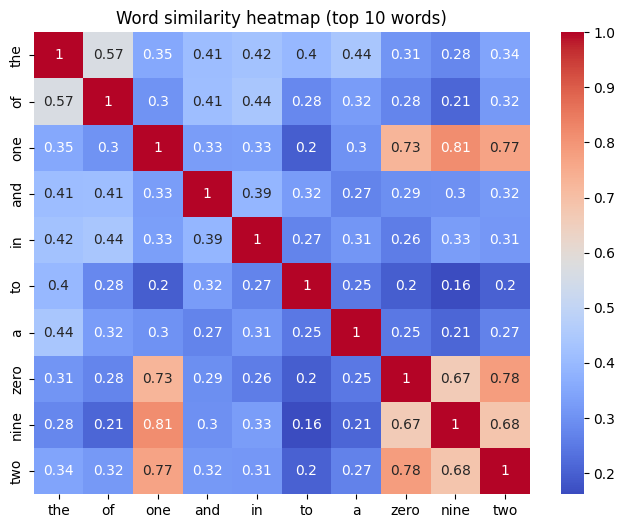

In [17]:
#Word similarity heat map
import seaborn as sns
import matplotlib.pyplot as plt

words = subset_words[:10]
matrix = np.zeros((10, 10))

for i, w1 in enumerate(words):
    for j, w2 in enumerate(words):
        matrix[i, j] = model.wv.similarity(w1, w2)

plt.figure(figsize=(8, 6))
sns.heatmap(matrix, xticklabels=words, yticklabels=words, annot=True, cmap="coolwarm")
plt.title("Word similarity heatmap (top 10 words)")
plt.show()